# P 12: INCOME CENSUS
## Goal: Predicting if a citizen has income above/below 50K from demographic census data
## Challenges: Categorical data type, missing data
    



#### Loading required modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading the dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

columns = ["age", "work-class", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
           
df = pd.read_csv(url, names=columns,sep=',',skipinitialspace=True)

In [89]:
df.head()

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [90]:
df.shape

(32561, 15)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work-class      32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Missing values identification and treatment 

In [92]:
df.isna().sum()

age               0
work-class        0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [93]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [94]:
### numerical 
numerical_cols = df.select_dtypes(exclude=['object'])
numerical_cols

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

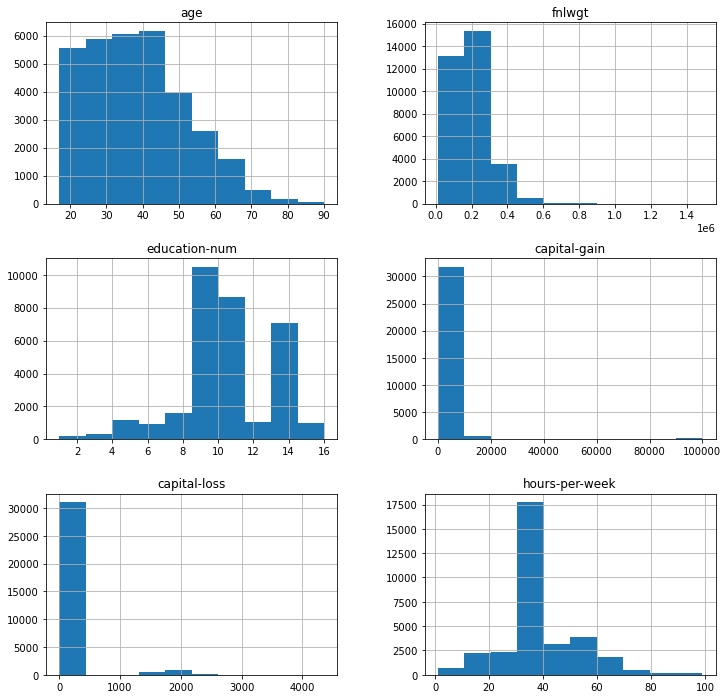

In [10]:
numerical_cols.hist(figsize=(12,12))

The visualization of the numerical attributes give us a few interesting insights on the distribution of values.

1. Most of the individuals have an age < 50 while the maximum age is around 90.
2. In general, people do not have investments other than their regular income. However, there are very few people who invest, and there are also a small number of outliers who earn more than 90000 via capital gains. However, among the people who had a, capital loss the average loss looks to be around 2000.
3. On average, most of the people have studied till education number 9 or 10 in the areas where the census was taken.
4. Most of the people work around 40 hrs per week. However there are a few who don't work and a few who work for almost 100 hours a week.

In [95]:
### categorical 
cat_cols = df.select_dtypes(include=['object'])
cat_cols

,work-class,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [96]:
# Iterate over all Categorical Column 
for col in cat_cols:
    # Select the column by name and get count of unique values in it
    count = df[col].value_counts()
    print('Count of Unique values in Column ', col, ' is : ' '\n' ,count, '\n' )

Count of Unique values in Column  work-class  is : 
 Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: work-class, dtype: int64 

Count of Unique values in Column  education  is : 
 HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64 

Count of Unique values in Column  marital-status  is : 
 Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
M

### Handling missing categorical values

In [97]:
df['native-country'].replace({"?":"United-States"},inplace=True)

In [98]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [100]:
df['occupation'].replace({"?":"Prof-specialty"},inplace=True)

In [101]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [102]:
df['work-class'].replace({"?":"Private"},inplace=True)
df['work-class'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

#### We have impute all the unknown values '?' with the mode of that particular column.

### Outlier analysis and treatment 

<AxesSubplot:ylabel='age'>

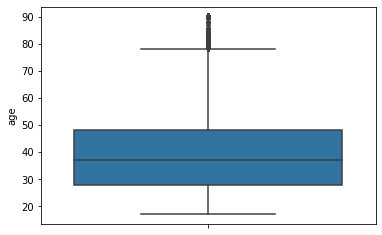

In [103]:
sns.boxplot(y=df['age'])

<AxesSubplot:ylabel='fnlwgt'>

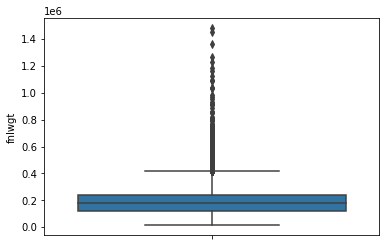

In [104]:
sns.boxplot(y=df['fnlwgt'])

<AxesSubplot:ylabel='education-num'>

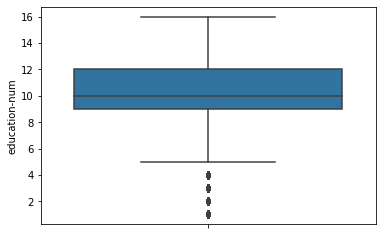

In [105]:
sns.boxplot(y=df['education-num'])

<AxesSubplot:ylabel='capital-gain'>

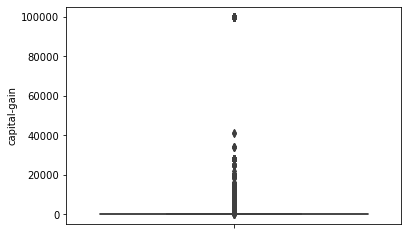

In [106]:
sns.boxplot(y=df['capital-gain'])

C:\Users\shazad\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital-loss'>

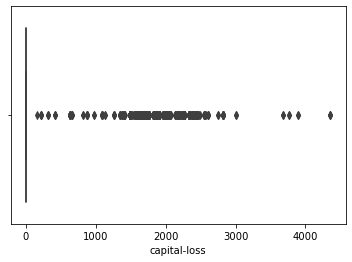

In [107]:
sns.boxplot(df['capital-loss'])

C:\Users\shazad\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week'>

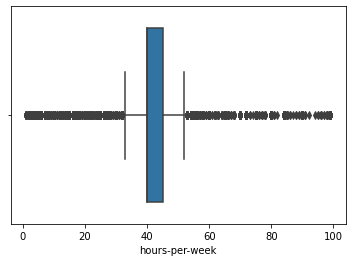

In [108]:
sns.boxplot(df['hours-per-week'])

In [109]:
# Iterate over all column names of Dataframe
for col in numerical_cols:
    # Select the column by name and get count of null values in it
    count = df[col].isna().sum()
    print('Count of Unique values in Column ', col, ' is : ' '\n' ,count, '\n' )

Count of Unique values in Column  age  is : 
 0 

Count of Unique values in Column  fnlwgt  is : 
 0 

Count of Unique values in Column  education-num  is : 
 0 

Count of Unique values in Column  capital-gain  is : 
 0 

Count of Unique values in Column  capital-loss  is : 
 0 

Count of Unique values in Column  hours-per-week  is : 
 0 



### Outlier Detection:

In [110]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

In [111]:
#sample_outliers_age
sample_outliers_age = detect_outliers_iqr(df['age']) 
print("Outliers from IQR method: ", len(sample_outliers_age))

-2.0 78.0
Outliers from IQR method:  143


In [112]:
for i in sample_outliers_age:
    df['age'].replace(i,78,inplace=True)

C:\Users\shazad\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

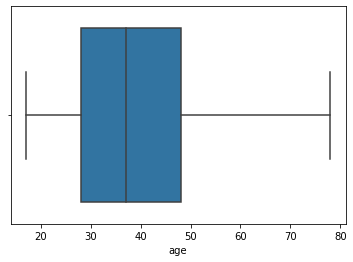

In [30]:
sns.boxplot(df['age'])

In [113]:
#sample_outliers_education
sample_outliers_ed = detect_outliers_iqr(df['education-num']) 
print("Outliers from IQR method: ", len(sample_outliers_ed))

4.5 16.5
Outliers from IQR method:  1198


In [114]:
for i in sample_outliers_ed:
    df['education-num'].replace(i,5,inplace=True)

C:\Users\shazad\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education-num'>

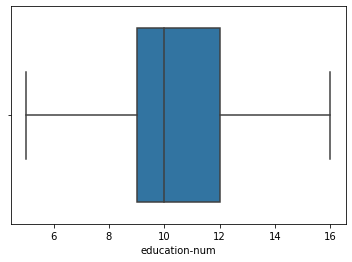

In [115]:
sns.boxplot(df['education-num'])

In [116]:
#sample_outliers_fn
sample_outliers_fn = detect_outliers_iqr(df['fnlwgt']) 
print("Outliers from IQR method: ", len(sample_outliers_fn))

-61009.0 415887.0
Outliers from IQR method:  992


In [117]:
for i in sample_outliers_fn:
    df['fnlwgt'].replace(i,400000,inplace=True)

C:\Users\shazad\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fnlwgt'>

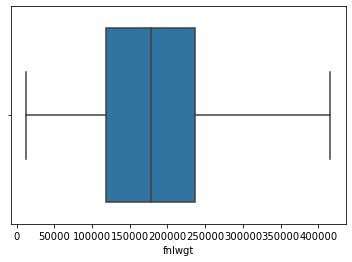

In [118]:
sns.boxplot(df['fnlwgt'])

In [119]:
#sample_outliers_hours
sample_outliers_h = detect_outliers_iqr(df['hours-per-week']) 
print("Outliers from IQR method: ", len(sample_outliers_h))

32.5 52.5
Outliers from IQR method:  9008


In [120]:
for i in sample_outliers_h:
    if i<32.5:
        df['hours-per-week'].replace(i,32.5,inplace=True)
    else:
        df['hours-per-week'].replace(i,52.5,inplace=True)

C:\Users\shazad\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week'>

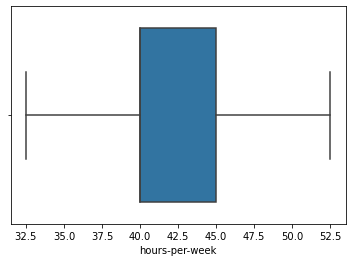

In [121]:
sns.boxplot(df['hours-per-week'])

In [122]:
df['capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital-gain, Length: 119, dtype: int64

In [123]:
df['capital-loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital-loss, Length: 92, dtype: int64

#### Capital-gain and Capital-loss column is dropped because approx 93% of the values encountered are zero. Hence, we can't interpret anything from these columns.

In [ ]:
df.drop(['capital-gain','capital-loss'],axis=1,inplace=True)

In [126]:
df.columns

Index(['age', 'work-class', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [127]:
df.describe()

,age,fnlwgt,education-num,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.555603,186345.067565,10.142717,41.202451
std,13.556130,93996.599990,2.419171,6.187005
min,17.000000,12285.000000,5.000000,32.500000
25%,28.000000,117827.000000,9.000000,40.000000
50%,37.000000,178356.000000,10.000000,40.000000
75%,48.000000,237051.000000,12.000000,45.000000
max,78.000000,415847.000000,16.000000,52.500000


### Compute the correlation matrix


Text(0.5, 1.05, 'Pearson Correlation of Features')

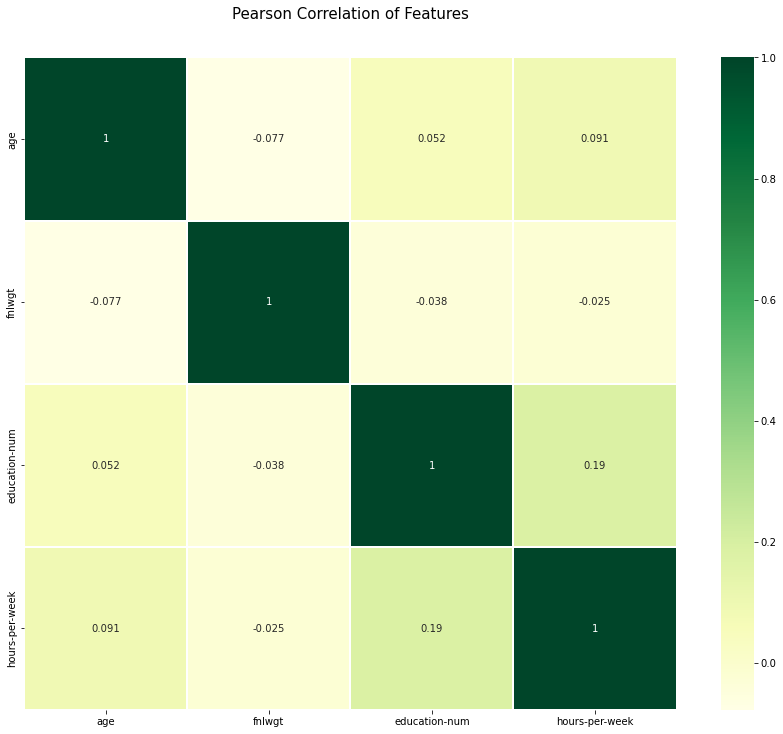

In [128]:
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)

plt.title('Pearson Correlation of Features', y=1.05, size=15)

#### Aggregating marital status


<AxesSubplot:xlabel='marital-status', ylabel='count'>

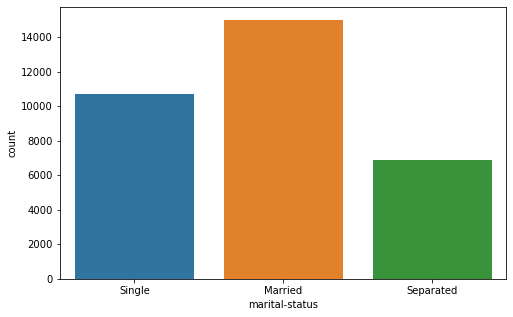

In [48]:
df['marital-status'].replace('Never-married', 'Single',inplace=True)
df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-spouse-absent'], 'Separated',inplace=True)
df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
df['marital-status'].replace(['Widowed'], 'Separated',inplace=True)

#Plotting count plot for marital status
fig = plt.figure(figsize=(8,5))
sns.countplot(x="marital-status", data=df)

#### Aggregating Native-Country:

<AxesSubplot:xlabel='native-country', ylabel='count'>

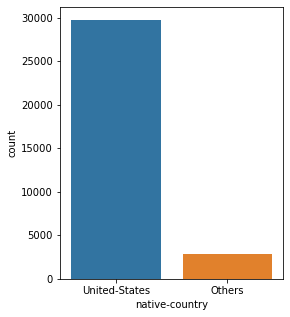

In [129]:
df['native-country'] = df['native-country'].apply(lambda el: "United-States" if el == "United-States" else "Others")

# Plotting count plot for native-country
fig = plt.figure(figsize=(4,5))
sns.countplot(x="native-country", data=df)

In [130]:
pd.crosstab(df['native-country'],df['sex'], margins=True)

sex,Female,Male,All
native-country,,,
Others,926,1882,2808
United-States,9845,19908,29753
All,10771,21790,32561


#### Aggregating Work-Class:

<AxesSubplot:xlabel='work-class', ylabel='count'>

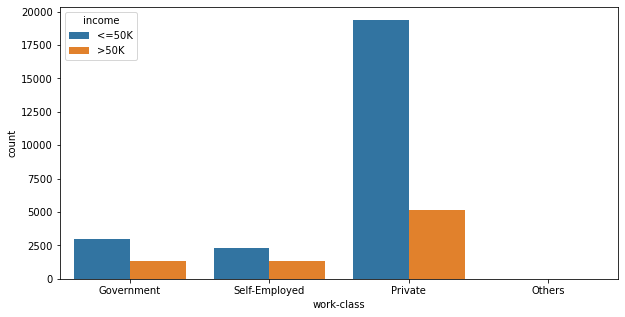

In [131]:
df['work-class'].replace('State-gov', 'Government',inplace=True)
df['work-class'].replace('Self-emp-not-inc', 'Self-Employed',inplace=True)
df['work-class'].replace('Federal-gov', 'Government',inplace=True)
df['work-class'].replace('Local-gov', 'Government',inplace=True)
df['work-class'].replace('Self-emp-inc', 'Self-Employed',inplace=True)
df['work-class'].replace('Without-pay', 'Others',inplace=True)
df['work-class'].replace('Never-worked', 'Others',inplace=True)

# Plotting count plot for working-class and income
fig = plt.figure(figsize=(10,5))
sns.countplot(x="work-class", hue="income", data=df)

#### Aggregating Education

<AxesSubplot:xlabel='education', ylabel='count'>

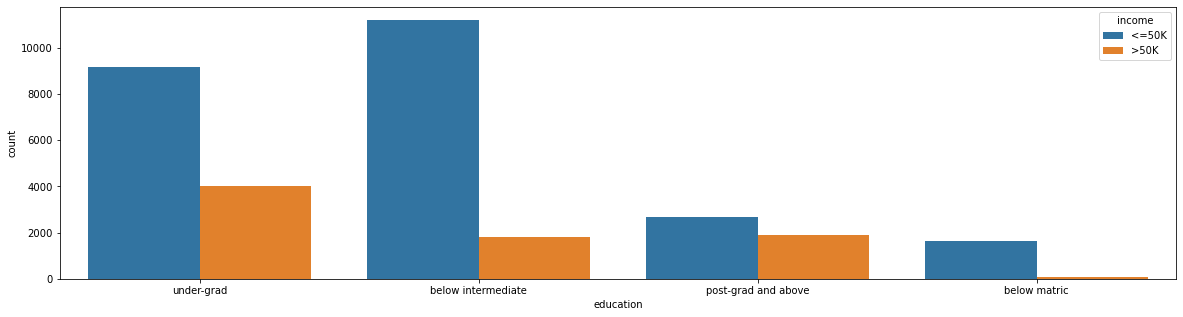

In [132]:
df['education'].replace('1st-4th', 'below matric',inplace=True)
df['education'].replace('5th-6th', 'below matric',inplace=True)
df['education'].replace('7th-8th', 'below matric',inplace=True)
df['education'].replace('9th', 'below matric',inplace=True)
df['education'].replace('Preschool', 'below matric',inplace=True)
df['education'].replace('HS-grad', 'below intermediate',inplace=True)
df['education'].replace('10th', 'below intermediate',inplace=True)
df['education'].replace('11th', 'below intermediate',inplace=True)
df['education'].replace('12th', 'below intermediate',inplace=True)
df['education'].replace('Bachelors', 'under-grad',inplace=True)
df['education'].replace('Prof-school', 'under-grad',inplace=True)
df['education'].replace('Some-college', 'under-grad',inplace=True)
df['education'].replace('Masters', 'post-grad and above',inplace=True)
df['education'].replace('Assoc-voc', 'post-grad and above',inplace=True)
df['education'].replace('Assoc-acdm', 'post-grad and above',inplace=True)
df['education'].replace('Doctorate', 'post-grad and above',inplace=True)


fig = plt.figure(figsize=(20,5))
sns.countplot(x="education", hue="income", data=df)

In [133]:
# Iterate over all column names of Dataframe
for col in cat_cols:
    # Select the column by name and get count of unique values in it
    count = df[col].unique()
    print('Count of Unique values in Column ', col, ' is : ' '\n' ,count, '\n' )

Count of Unique values in Column  work-class  is : 
 ['Government' 'Self-Employed' 'Private' 'Others'] 

Count of Unique values in Column  education  is : 
 ['under-grad' 'below intermediate' 'post-grad and above' 'below matric'] 

Count of Unique values in Column  marital-status  is : 
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

Count of Unique values in Column  occupation  is : 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv'] 

Count of Unique values in Column  relationship  is : 
 ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

Count of Unique values in Column  race  is : 
 ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

Count of Unique values in Column  sex  is : 
 ['Ma

### Data Transformation using Label Encoder and Dummy Variable:

In [134]:
from sklearn import preprocessing
lab = preprocessing.LabelEncoder()
df['work-class']=lab.fit_transform(df['work-class'])
df['income']=lab.fit_transform(df['income'])
df['native-country']=lab.fit_transform(df['native-country'])
df['sex']=lab.fit_transform(df['sex'])
df['race']=lab.fit_transform(df['race'])
df['relationship']=lab.fit_transform(df['relationship'])
df['marital-status']=lab.fit_transform(df['marital-status'])
df['education']=lab.fit_transform(df['education'])

In [135]:
dummy_vars = pd.get_dummies(df[['occupation']], drop_first=True)

In [136]:
df.drop(['occupation'],axis=1,inplace=True)

In [137]:
df2 = pd.concat([df,dummy_vars],axis=1)

In [138]:
df2.head()

,age,work-class,fnlwgt,education,education-num,marital-status,relationship,race,sex,hours-per-week,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,39,0,77516,3,13,4,1,4,1,40.0,...,0,0,0,0,0,0,0,0,0,0
1,50,3,83311,3,13,2,0,4,1,32.5,...,0,0,0,0,0,0,0,0,0,0
2,38,2,215646,0,9,0,1,4,1,40.0,...,0,1,0,0,0,0,0,0,0,0
3,53,2,234721,0,7,2,0,2,1,40.0,...,0,1,0,0,0,0,0,0,0,0
4,28,2,338409,3,13,2,5,2,0,40.0,...,0,0,0,0,0,1,0,0,0,0


In [139]:
df2.shape

(32561, 25)

In [140]:
x1 = df2.copy()

In [141]:
x1.drop('income',axis=1,inplace=True)

In [142]:
y = df2.income

### Splitting dataset into Train and Test:

In [143]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 0.2, random_state = 0)

### Data Scaling: Standarization

In [144]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [145]:
y_train.value_counts()

0    19802
1     6246
Name: income, dtype: int64

In [146]:
y_test.value_counts()

0    4918
1    1595
Name: income, dtype: int64

### Data Modelling: Logistic Regression

In [147]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [148]:
lr = LogisticRegression()
lr

LogisticRegression()

In [149]:
l1 = lr.fit(x_train,y_train)

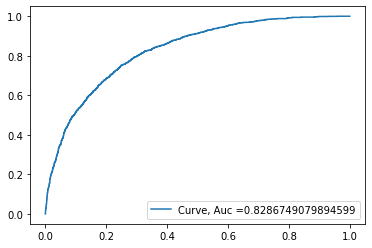

In [150]:
y_pred = l1.predict_proba(x_test)[:,1]
fpr,tpr,a = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label = 'Curve, Auc ='+str(auc))
plt.legend(loc=4)
plt.show()

For Test data
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4918
           1       0.67      0.44      0.53      1595

    accuracy                           0.81      6513
   macro avg       0.75      0.69      0.71      6513
weighted avg       0.80      0.81      0.80      6513

For Train data
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     19802
           1       0.67      0.45      0.54      6246

    accuracy                           0.81     26048
   macro avg       0.75      0.69      0.71     26048
weighted avg       0.80      0.81      0.80     26048



<AxesSubplot:>

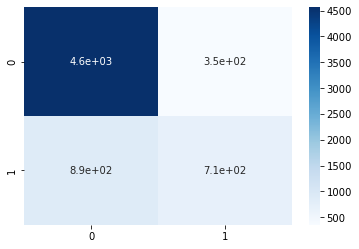

In [151]:
pred_res_lg = l1.predict(x_test)
pred_res_lg1=l1.predict(x_train)
print("For Test data")
print(classification_report(y_test,pred_res_lg))
print("For Train data")
print(classification_report(y_train,pred_res_lg1))
p=confusion_matrix(y_test,pred_res_lg)
sns.heatmap(p,annot=True,cmap='Blues')

### Data Modelling: Decision Tree Classifier

In [152]:
from sklearn.tree import DecisionTreeClassifier
d1 = DecisionTreeClassifier()
d2 = d1.fit(x_train,y_train)

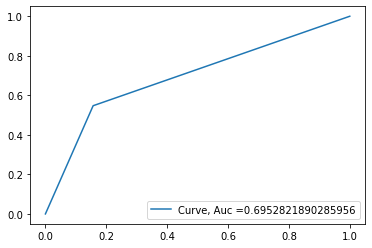

In [153]:
y_pred = d2.predict_proba(x_test)[:,1]
fpr,tpr,a = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label = 'Curve, Auc ='+str(auc))
plt.legend(loc=4)
plt.show()

####  AUROC is very less. Hence no need to further evaluation on the test data.

###  Data Modelling: Hyper parameter tuning for Decision Tree

In [154]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [155]:
params = {'max_depth' : [2,4,6,8,10],
         'max_leaf_nodes' : [5,8,10,12],
         'min_samples_leaf' : [1,2,3,4]}

clf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf, param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_leaf_nodes': [5, 8, 10, 12],
                         'min_samples_leaf': [1, 2, 3, 4]})

In [156]:
gcv.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=12)

In [157]:
new_model = gcv.best_estimator_
new_model.fit(x_train,y_train)
y_train_pred = new_model.predict(x_train)
y_test_pred = new_model.predict(x_test)

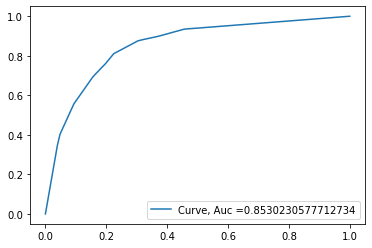

In [158]:
y_pred = new_model.predict_proba(x_test)[:,1]
fpr,tpr,a = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label = 'Curve, Auc ='+str(auc))
plt.legend(loc=4)
plt.show()

For Test data
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      4918
           1       0.66      0.56      0.60      1595

    accuracy                           0.82      6513
   macro avg       0.76      0.73      0.74      6513
weighted avg       0.81      0.82      0.82      6513

For Train data
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     19802
           1       0.67      0.56      0.61      6246

    accuracy                           0.83     26048
   macro avg       0.77      0.74      0.75     26048
weighted avg       0.82      0.83      0.82     26048



<AxesSubplot:>

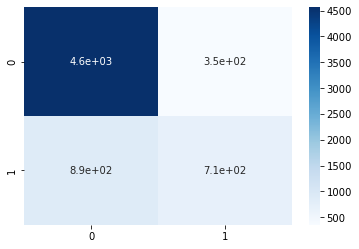

In [159]:
pred_res_dt = new_model.predict(x_test)
pred_res_dt1=new_model.predict(x_train)
print("For Test data")
print(classification_report(y_test,pred_res_dt))
print("For Train data")
print(classification_report(y_train,pred_res_dt1))
p=confusion_matrix(y_test,pred_res_lg)
sns.heatmap(p,annot=True,cmap='Blues')

###  Data Modelling: Random Forest Classifier

In [160]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=120)
rf1 = rf.fit(x_train,y_train)

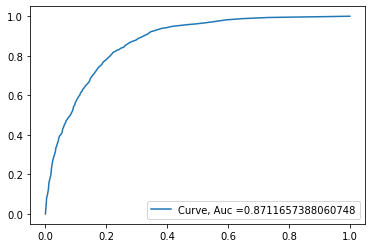

In [161]:
y_pred = rf1.predict_proba(x_test)[:,1]
fpr,tpr,a = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label = 'Curve, Auc ='+str(auc))
plt.legend(loc=4)
plt.show()

For Test data
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4918
           1       0.65      0.55      0.60      1595

    accuracy                           0.82      6513
   macro avg       0.76      0.73      0.74      6513
weighted avg       0.81      0.82      0.81      6513

For Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19802
           1       1.00      1.00      1.00      6246

    accuracy                           1.00     26048
   macro avg       1.00      1.00      1.00     26048
weighted avg       1.00      1.00      1.00     26048



<AxesSubplot:>

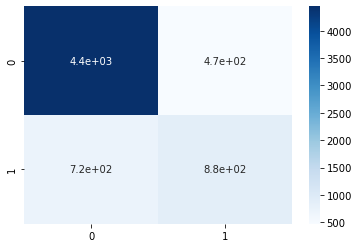

In [162]:
print("For Test data")
pred_res_test = rf1.predict(x_test)
print(classification_report(y_test,pred_res_test))
print("For Train data")
pred_res_train = rf1.predict(x_train)
print(classification_report(y_train,pred_res_train))
p=confusion_matrix(y_test,pred_res_test)
sns.heatmap(p,annot=True,cmap='Blues')

#### Our model suffer from over-fitting. Hence we have to go for hyper-parameter tunining.

### Data Modelling: Hyper parameter tuning for Random forest

In [163]:
rf = RandomForestClassifier(n_estimators=90,min_samples_leaf=8,min_samples_split=5,criterion='entropy',max_features=5)
rf1 = rf.fit(x_train,y_train)

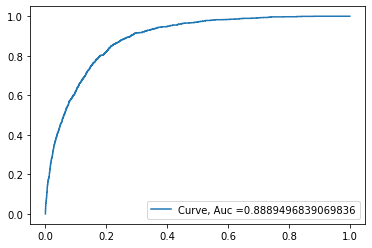

In [164]:
y_pred = rf1.predict_proba(x_test)[:,1]
fpr,tpr,a = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label = 'Curve, Auc ='+str(auc))
plt.legend(loc=4)
plt.show()

For Test data
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4918
           1       0.70      0.57      0.63      1595

    accuracy                           0.84      6513
   macro avg       0.79      0.75      0.76      6513
weighted avg       0.83      0.84      0.83      6513

For Train data
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     19802
           1       0.77      0.62      0.68      6246

    accuracy                           0.86     26048
   macro avg       0.83      0.78      0.80     26048
weighted avg       0.86      0.86      0.86     26048



<AxesSubplot:>

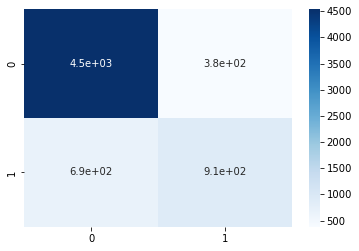

In [165]:
print("For Test data")
pred_res_rf = rf1.predict(x_test)
print(classification_report(y_test,pred_res_rf))
print("For Train data")
pred_res_rf1 = rf1.predict(x_train)
print(classification_report(y_train,pred_res_rf1))
p=confusion_matrix(y_test,pred_res_rf)
sns.heatmap(p,annot=True,cmap='Blues')

### Different Model's Evaluation on the basis of Accuracy:

In [166]:
print(f' Accuracy from Logistic Regression: {accuracy_score(y_test,pred_res_lg)}')
print(f' Accuracy from Decision Tree: {accuracy_score(y_test,pred_res_dt)}')
print(f' Accuracy from Random Forest: {accuracy_score(y_test,pred_res_rf)}')

 Accuracy from Logistic Regression: 0.8093044679871028
 Accuracy from Decision Tree: 0.82081989866421
 Accuracy from Random Forest: 0.8354061108552127


#### We are getting best accuracy from Random Forest after pruning and also model doesn't suffer from over-fitting. Hence this model is best among the rest of the model.

## Team Members:
1. Aman Kumar Singh
2. Anwesha Patnaik
3. Bapuji Sirla
4. Shagufta Anjum Azad
5. Sidhi Agarwal